In [41]:
import pandas as pd

In [42]:
health_data = pd.read_csv("Health_dataset.csv")


In [43]:
health_data.head(5)

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28


In [44]:
#Total number of patients 
total_patients = health_data.shape[0]
print("Total Patients = ", total_patients)

Total Patients =  8000


In [45]:
#Gender wise distribution 

gender_count = health_data['Gender'].value_counts()
gender_count

Gender
Male      5206
Female    2794
Name: count, dtype: int64

In [46]:
#Visualization of gender distribution 
import matplotlib.pyplot as plt 

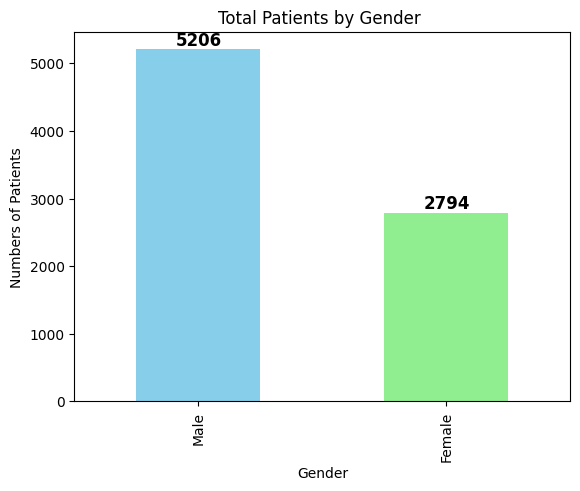

In [47]:
ax= gender_count.plot(
    kind='bar', color = ['skyblue','lightgreen']
)

# Display count on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Total Patients by Gender ')
plt.ylabel('Numbers of Patients')
plt.show()

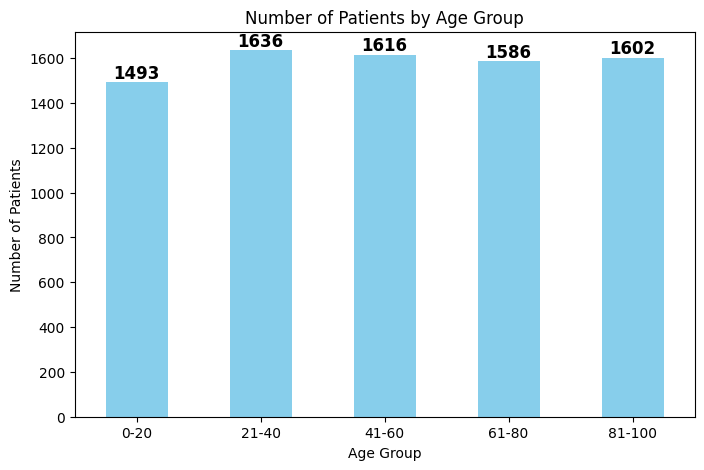

In [49]:

# Creating DataFrame
df = pd.DataFrame(health_data)

# Convert 'Date of Birth' to datetime format
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

# Convert 'Date of Birth' and 'Admission Date' to datetime
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
df['Admission Date'] = pd.to_datetime(df['Admission Date'])

# Calculate Age at the time of Admission
df['Age'] = df['Admission Date'].dt.year - df['Date of Birth'].dt.year


# Define Age Groups
bins = [0, 20, 40, 60, 80, 100]  # Age group ranges
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count patients in each Age Group
age_group_count = df['Age Group'].value_counts().sort_index()

# Plot Bar Chart
ax = age_group_count.plot(kind='bar', color='skyblue', figsize=(8, 5))

# Display count on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labels and Title
plt.title('Number of Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)

# Show plot
plt.show()
